# Visualizing the Statistics of the Best-Selling Books
**1. Checking Data**

Familiarized myself with the dataset by using Pandas & Identified any errors, if any.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
file = '/content/best-selling-books.csv'
df = pd.read_csv(file)
#missing 56 values from genre
#size of dataset 174 rows & 6 columns
#No duplicate data
df.head(3) #first 3 books in data set

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy


In [ ]:
df.tail(3) #last 3 books in data set

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN
173,Bridget Jones's Diary,Helen Fielding,English,1996,10.0,NaN


In [ ]:
#Setting variables
published_mean = df['First published'].mean() #average year published
max_year_published = df['First published'].max() #Newest best-selling published book
min_year_published = df['First published'].min() #Oldest best-selling published book
totals = df['First published'].count() #Total books in data set
min_year_row = df[df['First published'] == min_year_published]
book_name = min_year_row['Book'].values[0]
max_year_row = df[df['First published'] == max_year_published]
book_name2 = max_year_row['Book'].values[0]


print(f'The average year best-selling books were published is {published_mean:.1f}')
print(f'The newest best-selling published book is {book_name2} and it was published in {max_year_published}')
print(f'The oldest best-selling published book is {book_name} and it was published in {min_year_published}')
print(f'The total amount of books in this dataset is {totals}')

The average year best-selling books were published is 1962.5
The newest best-selling published book is Where the Crawdads Sing and it was published in 2018
The oldest best-selling published book is The Divine Comedy (La Divina Commedia) and it was published in 1304
The total amount of books in this dataset is 174


# Statistics of Sales

In [ ]:
sales_stats = df['Approximate sales in millions'].describe()
print(f'Analysis of sales\n{sales_stats}')

Analysis of sales
count    174.000000
mean      30.097126
std       27.957985
min       10.000000
25%       14.000000
50%       20.000000
75%       36.300000
max      200.000000
Name: Approximate sales in millions, dtype: float64


# Visualizing Sales

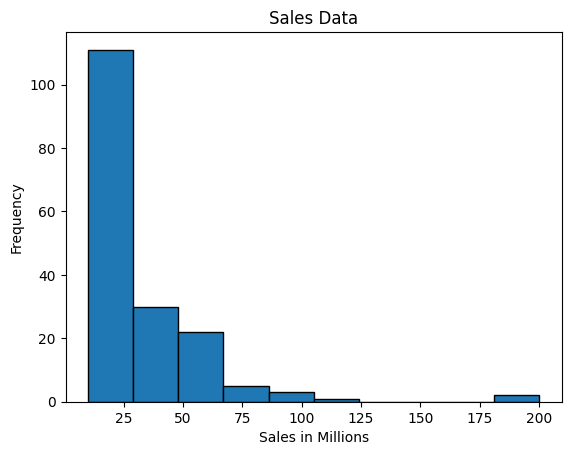

In [ ]:
plt.hist(df['Approximate sales in millions'], edgecolor = 'black')
plt.title('Sales Data')
plt.xlabel('Sales in Millions')
plt.ylabel('Frequency')
plt.show()

# Statistics of Top 10 Rated Books

In [ ]:
top_sellers = df.sort_values('Approximate sales in millions', ascending = False).head(11)
print(f'Analysis of top rated books\n{top_sellers}')

Analysis of top rated books
                                        Book                 Author(s)  \
0                       A Tale of Two Cities           Charles Dickens   
1        The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2   Harry Potter and the Philosopher's Stone             J. K. Rowling   
4             Dream of the Red Chamber (紅樓夢)                Cao Xueqin   
5                                 The Hobbit          J. R. R. Tolkien   
3                   And Then There Were None           Agatha Christie   
6       The Lion, the Witch and the Wardrobe               C. S. Lewis   
7                She: A History of Adventure          H. Rider Haggard   
8        Vardi Wala Gunda (वर्दी वाला गुंडा)        Ved Prakash Sharma   
9                          The Da Vinci Code                 Dan Brown   
10   Harry Potter and the Chamber of Secrets             J. K. Rowling   

   Original language  First published  Approximate sales in millions  \
0          

# Visualizing Top 10 Rated Books By Sale

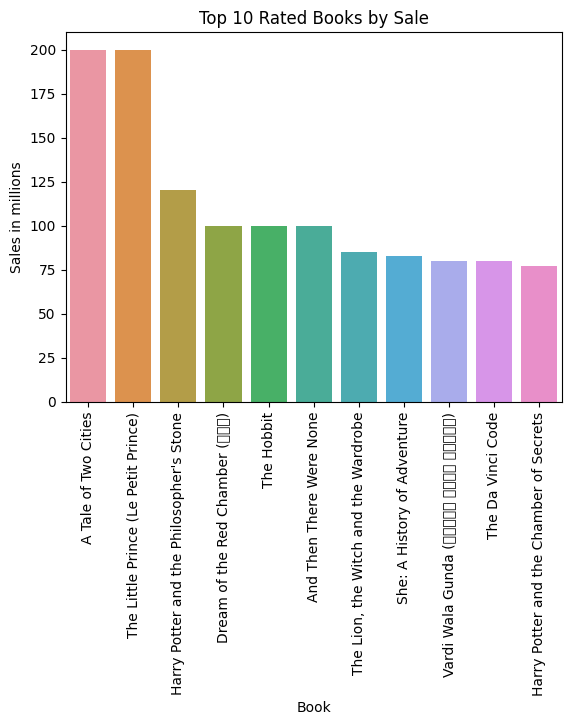

In [ ]:
#Using seaborn
sns.barplot(data=top_sellers, x='Book', y='Approximate sales in millions')
plt.title('Top 10 Rated Books by Sale')
plt.xlabel('Book')
plt.ylabel('Sales in millions')
plt.xticks(rotation=90)
plt.show()

# Statistics of Top 10 Genres

In [ ]:
genre_sales = df.groupby('Genre')['Approximate sales in millions'].sum().reset_index()
top_genres =  genre_sales.nlargest(10, 'Approximate sales in millions')
print(f'Analysis of the best-selling genres\n{top_genres}')

Analysis of the best-selling genres
                          Genre  Approximate sales in millions
25                      Fantasy                          737.0
31           Historical fiction                          295.0
45                        Novel                          259.5
61                    Self-help                          210.0
47                      Novella                          200.0
26  Fantasy, Children's fiction                          120.0
8            Children's fiction                          100.0
24                  Family saga                          100.0
41                      Mystery                          100.0
5         Children's Literature                           94.0


# Visualizing Top 10 Genres

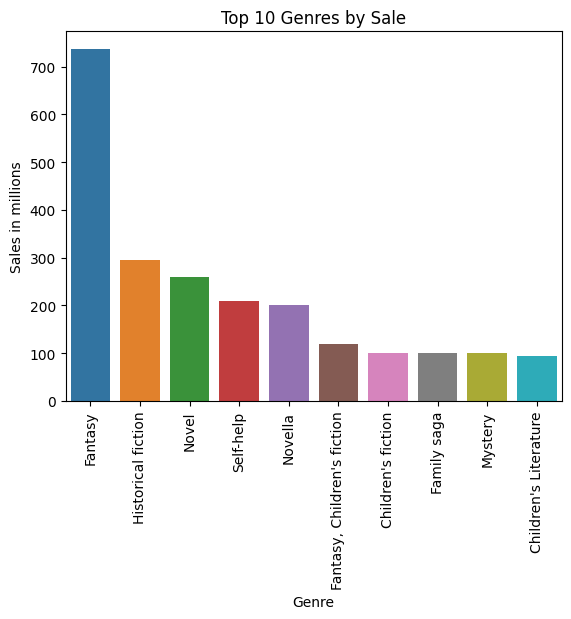

In [ ]:
#Using seaborn
sns.barplot(data=top_genres, x='Genre', y='Approximate sales in millions')
plt.title('Top 10 Genres by Sale')
plt.xlabel('Genre')
plt.ylabel('Sales in millions')
plt.xticks(rotation=90)
plt.show()

# Statistics of Authors with Highest Sales

In [ ]:
top_authors = df.groupby('Author(s)')['Approximate sales in millions'].sum().nlargest(10)
print(f'Authors with the most sales\n{top_authors}')

Authors with the most sales
Author(s)
J. K. Rowling               522.0
Antoine de Saint-Exupéry    200.0
Charles Dickens             200.0
Dan Brown                   149.0
Agatha Christie             100.0
Cao Xueqin                  100.0
J. R. R. Tolkien            100.0
C. S. Lewis                  85.0
H. Rider Haggard             83.0
Ved Prakash Sharma           80.0
Name: Approximate sales in millions, dtype: float64


# Visualizing Data for Authors with Highest Sales

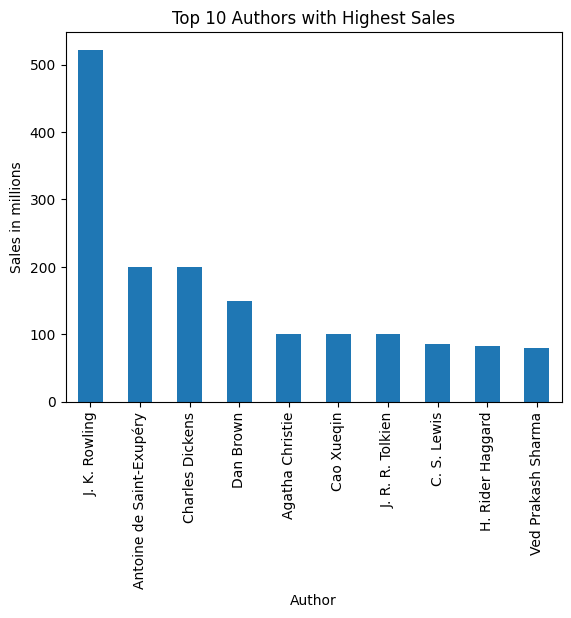

In [ ]:
top_authors.plot(kind = 'bar')
plt.title('Top 10 Authors with Highest Sales')
plt.xlabel('Author')
plt.ylabel('Sales in millions')
plt.xticks(rotation=90)
plt.show()

# Statistics of Sales by Language of Origin

In [ ]:
language_sales = df.groupby('Original language')['Approximate sales in millions'].sum().reset_index()
print(f'Sales by Language of Origin (Alphabetical Order)\n{language_sales}')

Sales by Language of Origin (Alphabetical Order)
   Original language  Approximate sales in millions
0            Chinese                          140.0
1              Czech                           20.0
2              Dutch                           35.0
3            English                         3966.0
4             French                          257.0
5             German                          113.0
6           Gujarati                           10.0
7              Hindi                          100.0
8            Italian                          110.5
9           Japanese                           72.0
10         Norwegian                           60.0
11        Portuguese                           65.0
12           Russian                          163.4
13           Spanish                           75.0
14           Swedish                           40.0
15           Yiddish                           10.0


# Visualizing Language of Origin

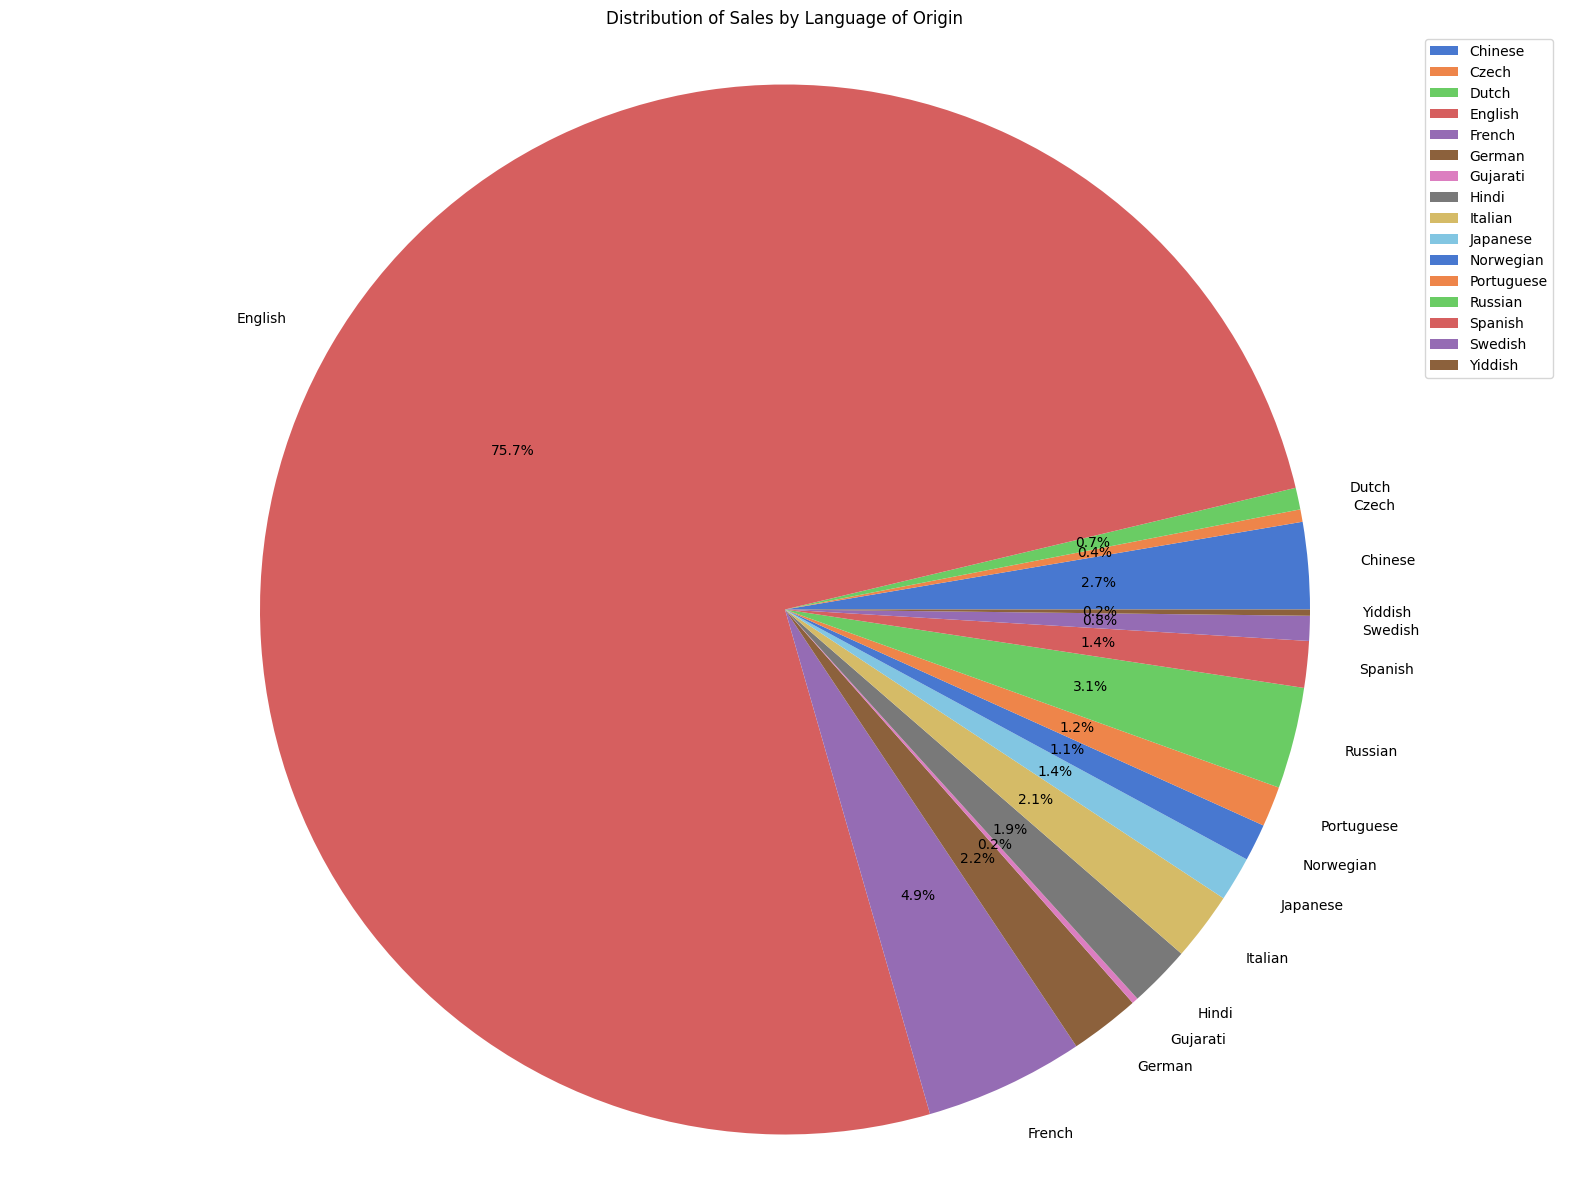

In [ ]:
#autopct='%1.1f%%',
colors = sns.color_palette('muted')[0:len(language_sales)]
plt.figure(figsize=(20, 15))
plt.title('Distribution of Sales by Language of Origin')
plt.pie(language_sales['Approximate sales in millions'], labels = language_sales['Original language'], autopct='%1.1f%%', colors = colors)
plt.legend(language_sales['Approximate sales in millions'], labels = language_sales['Original language'], loc = 'best' )
plt.axis('equal')
plt.show()
